# Exploratory Data Analysis

In [81]:
%run setup.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
# get cleaned data: if available form storage otherwise from file
%store -r data_daily data_hourly

In [83]:
# TODO does not yet work with reload
# try:
#     data
# except:
#     print('data does not exist in storage, looking for file')
# data = pd.read_parquet(config['processed_data_paths']['daily'])

# Defs

In [ ]:
def agg_data_frame(df: pd.DataFrame(), by, agg_map: dict) -> pd.DataFrame:
    '''
    Aggregate hourly or daily Dataframe by
    '''
    try:
        df_agg = df.groupby(by=by).agg(agg_map)
        df_agg.columns = df_agg.columns.map('_'.join)
        if 'wmo_code_<lambda>' in df_agg.columns:
            df_agg = df_agg.rename(columns={'wmo_code_<lambda>':'wmo_codes'})
        return df_agg
    except:
        raise Exception('error in agg_data_frame')


# Data Overview

In [85]:
data_daily.head()

,casual,date,member,total_rides,apparent_temperature_mean,temperature_2m_mean,wmo_code,windspeed_10m_max,week_nr,week_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,53,5
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,53,6
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,53,7
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,1
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2


In [86]:
data_hourly.head()

,casual,member,total_rides,relativehumidity_2m,temperature_2m,wmo_code,windspeed_10m,datetime
0,20,26,46,90,2.4,1,10.2,2021-01-01 00:00:00
1,23,23,46,88,1.8,1,10.0,2021-01-01 01:00:00
2,20,28,48,87,1.1,2,10.1,2021-01-01 02:00:00
3,9,7,16,81,1.6,2,10.6,2021-01-01 03:00:00
4,7,5,12,77,1.6,2,9.9,2021-01-01 04:00:00


# Aggregate Data

In [259]:
# aggregate daily data
agg_map_daily = {
    'casual' : ['sum', 'mean', 'std'],
    'member' : ['sum', 'mean', 'std'],
    'total_rides' : ['sum', 'mean', 'std'],
    'apparent_temperature_mean' : 'mean',
    'temperature_2m_mean' : 'mean',
    'wmo_code' : lambda x: ', '.join(str(x)),
    'windspeed_10m_max' : 'max'
    }

data_daily_year = agg_data_frame(data_daily, data_daily.date.dt.year, agg_map_daily)
data_daily_month = agg_data_frame(data_daily, data_daily.date.dt.month, agg_map_daily)
data_daily_month_2023 = agg_data_frame(data_daily[data_daily.date.dt.year == 2023], data_daily.date.dt.month, agg_map_daily)
# data_daily_weekday = agg_data_frame(data_daily, data_daily.date.dt.month, agg_map_daily)

data_daily_year.head()

,casual_sum,casual_mean,casual_std,member_sum,member_mean,member_std,total_rides_sum,total_rides_mean,total_rides_std,apparent_temperature_mean_mean,temperature_2m_mean_mean,wmo_codes,windspeed_10m_max_max
date,,,,,,,,,,,,,
2021,1116554,3059.052055,1781.143146,1633327,4474.868493,1706.080462,2749881,7533.920548,3112.366188,13.775616,14.690411,"0, , , , , , , 6, 3, \n, 1, , , , , ...",36.7
2022,1431677,3922.402740,2226.069992,2045105,5603.027397,1919.043446,3476782,9525.430137,3809.983862,12.890685,14.013699,"3, 6, 5, , , , , 6, 3, \n, 3, 6, 6, , , ...",33.3
2023,1652972,4528.690411,2054.539992,2814362,7710.580822,2363.844647,4467334,12239.271233,3983.046929,11.843014,14.534247,"7, 3, 0, , , , , , , 1, \n, 7, 3, 1, , ...",40.1


In [ ]:
# aggregate daily data
agg_map_hourly = {
    'casual'                : ['sum', 'mean', 'std'],
    'member'                : ['sum', 'mean', 'std'],
    'total_rides'           : ['sum', 'mean', 'std'],
    'relativehumidity_2m'   : ['min', 'mean', 'max'],
    'windspeed_10m'         : ['min', 'mean', 'max'],
    'wmo_code' : lambda x: ', '.join(str(x))
    }

data_hourly_year = agg_data_frame(data_hourly, data_hourly.datetime.dt.year, agg_map_hourly)
data_hourly_month = agg_data_frame(data_hourly, data_hourly.datetime.dt.month, agg_map_hourly)
data_hourly_hour = agg_data_frame(data_hourly, data_hourly.datetime.dt.hour, agg_map_hourly)

data_hourly_year.head()

,casual_sum,casual_mean,casual_std,member_sum,member_mean,member_std,total_rides_sum,total_rides_mean,total_rides_std,relativehumidity_2m_min,relativehumidity_2m_mean,relativehumidity_2m_max,windspeed_10m_min,windspeed_10m_mean,windspeed_10m_max,wmo_codes
datetime,,,,,,,,,,,,,,,,
2021,1116554,127.577011,136.971162,1633327,186.623286,165.148069,2749881,314.200297,283.957139,24,69.096321,100,0.0,9.915791,36.7,"0, , , , , , , , , 1, \n, 1, , , , ..."
2022,1431677,163.470770,173.523574,2045105,233.512788,203.397261,3476782,396.983558,357.953690,23,68.845284,100,0.4,10.361110,33.3,"8, 7, 5, 2, , , , , , 5, 3, \n, 8, 7, 5, ..."
2023,1652972,188.716977,182.315155,2814362,321.310880,272.503268,4467334,510.027857,435.084159,5,50.952506,100,0.0,10.233908,40.1,"1, 7, 5, 1, 0, , , , , 0, \n, 1, 7, 5, 1, ..."


# Total Rides per year

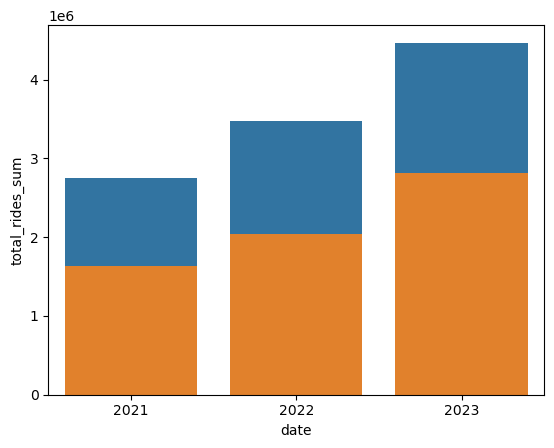

In [89]:
# TODO plot fraction of members
sns.barplot(data_daily_year, x='date', y='total_rides_sum')
sns.barplot(data_daily_year, x='date', y='member_sum')

plt.show()

- The total number of rides has continuously been increasing from 2021 to 2023.
- The fraction of members has also been increasing.

# Daily Rides across the years

In [90]:
years = [2021, 2022, 2023]
data_daily_peryear = [data_daily[data_daily.date.dt.year==year] for year in years]
# data_daily_2021 = data_daily[data_daily.date.dt.year==2021]
# data_daily_2022 = data_daily[data_daily.date.dt.year==2022]
# data_daily_2023 = data_daily[data_daily.date.dt.year==2023]

In [91]:
# import seaborn.objects as so

# plot = sns.lineplot(data=data_daily_2021, x='date', y='total_rides')

# v1
# p = so.Plot(data_daily_2021, x="date", ymin=0, ymax="total_rides")
# plot.add(so.Band())

# v2
# p = so.Plot(data_daily_2021, "date", "total_rides")
# p.add(so.Area(edgewidth=0)).add(so.Line())

In [256]:
data_daily_peryear[-1].describe()

,casual,date,member,total_rides,apparent_temperature_mean,temperature_2m_mean,wmo_code,windspeed_10m_max,week_nr,week_day
count,365.000000,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.0
mean,4528.690411,2023-07-02 00:00:00,7710.580822,12239.271233,11.843014,14.534247,17.002740,17.135616,26.569863,4.008219
min,646.000000,2023-01-01 00:00:00,1713.000000,2369.000000,-12.900000,-8.700000,0.000000,6.600000,1.0,1.0
25%,2853.000000,2023-04-02 00:00:00,5964.000000,8819.000000,2.400000,6.100000,1.000000,12.500000,14.0,2.0
50%,4717.000000,2023-07-02 00:00:00,8124.000000,13250.000000,12.400000,14.900000,2.000000,15.500000,27.0,4.0
75%,5755.000000,2023-10-01 00:00:00,9356.000000,15442.000000,21.500000,22.700000,51.000000,21.000000,40.0,6.0
max,11550.000000,2023-12-31 00:00:00,12580.000000,20174.000000,32.000000,34.700000,73.000000,40.100000,52.0,7.0
std,2054.539992,NaN,2363.844647,3983.046929,11.237957,10.278672,24.811985,6.464046,15.067565,2.006155


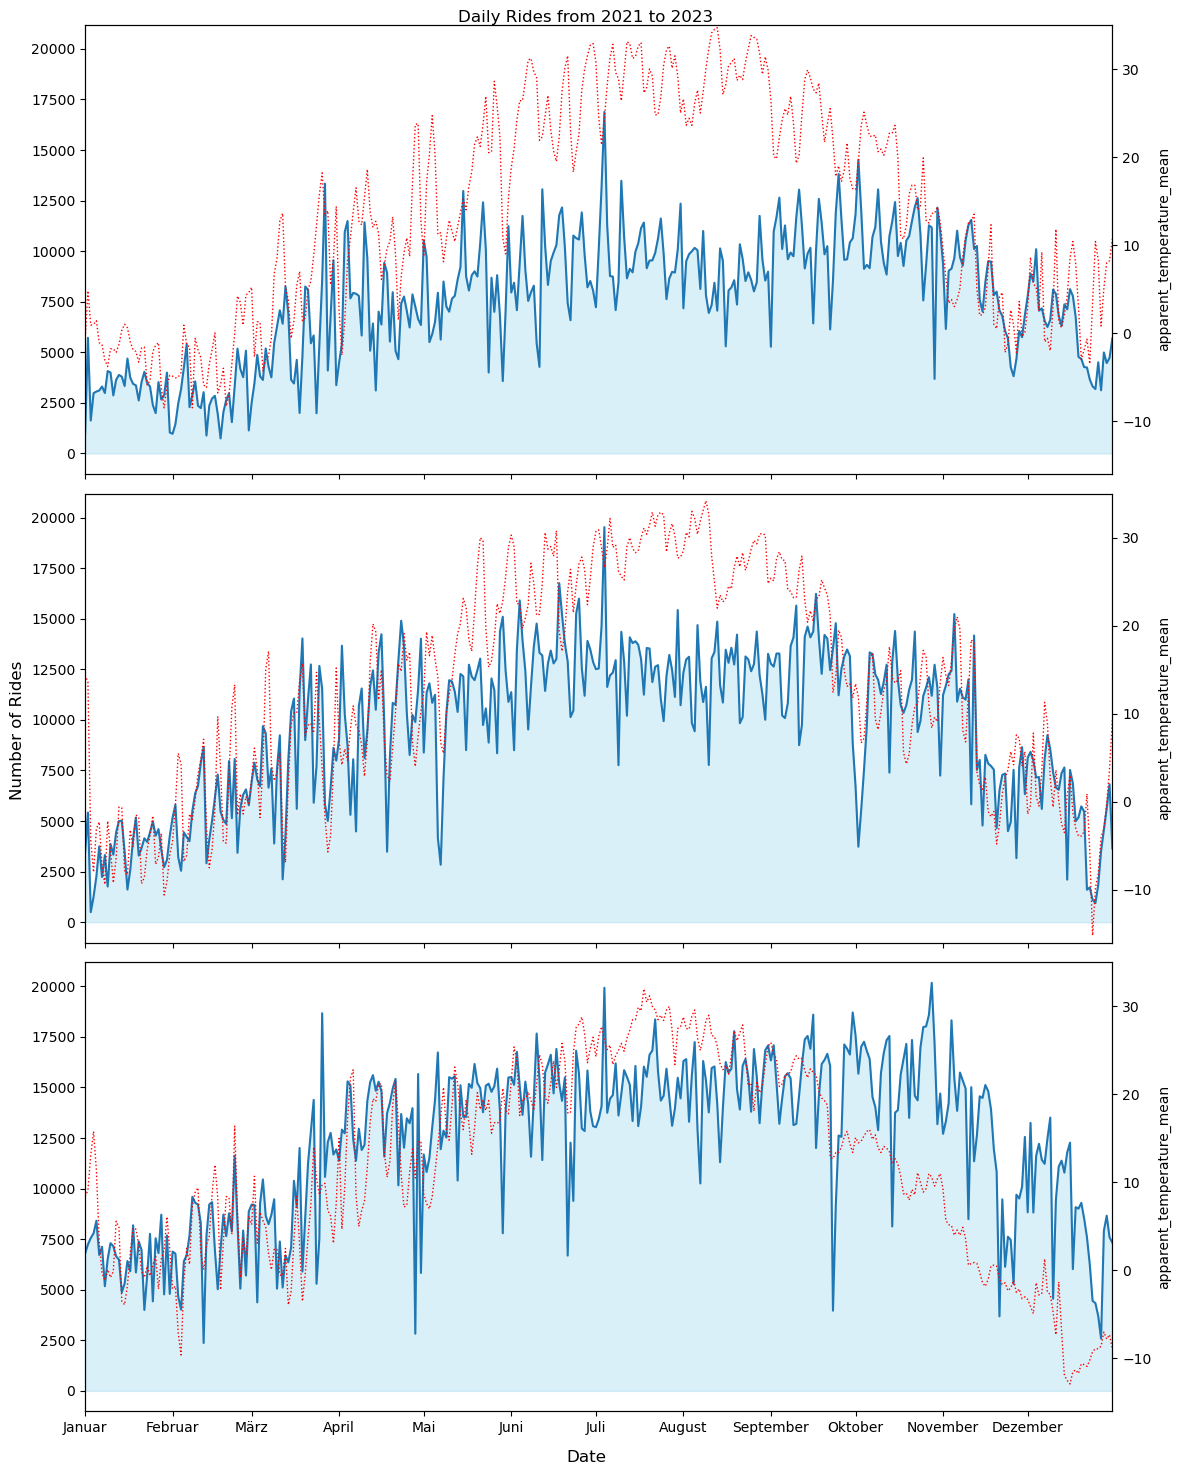

In [258]:
fig, ax = plt.subplots(3, 1, figsize=(12,15), sharey=True)
ax = ax.flatten()

# sharex does not work, so: remove labels on ax[0] and ax[1]
for i, (data, year, a) in enumerate(zip(data_daily_peryear, years, ax)):
    a2 = a.twinx()
    a2.set_ylim([-16, 35])
    sns.lineplot(data, x='date', y='total_rides', ax=a)
    sns.lineplot(data, x='date', y='apparent_temperature_mean', color='r', linestyle='dotted', linewidth=1, ax=a2)
    a.fill_between(data['date'], data['total_rides'], 0, color='skyblue', alpha=0.3, label='Area above zero')
    a.set_xlabel('')
    a.set_ylabel('')
    a.set_xticklabels([])
    a.set_xticks([datetime.datetime(year, i, 1) for i in range(1,13)])
    a.set_xlim([datetime.datetime(year, 1, 1), datetime.datetime(year, 12, 31)])


ax[-1].set_xticklabels(MONTHS)
# ax[-1].set_xlabel('Date')
# ax[-1].set_ylabel('Count')

plt.suptitle('Daily Rides from 2021 to 2023')
fig.supxlabel('Date')
fig.supylabel('Number of Rides')

plt.tight_layout()
plt.show()

- How to explain the minima?
- How to explain the maxima?

# Rides per Month

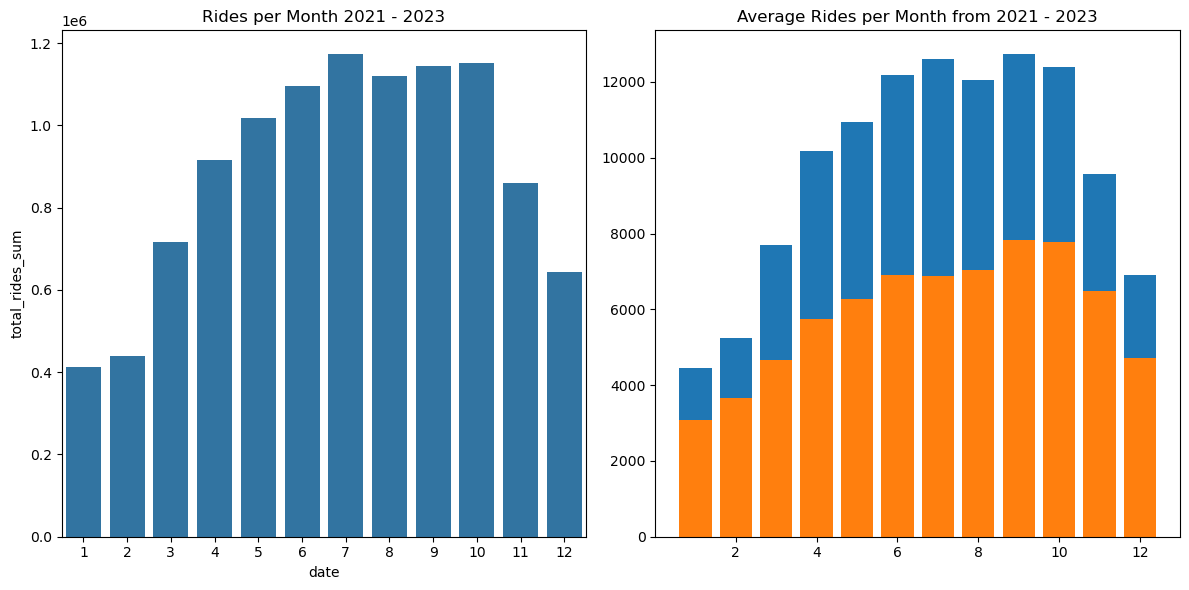

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_title('Rides per Month 2021 - 2023')
sns.barplot(ax=ax[0], data=data_daily_month, x='date', y='total_rides_sum')

# TODO configure x-axis, set labels
ax[1].set_title('Average Rides per Month from 2021 - 2023')
# plt.errorbar(x=data_daily_month.index, y=data_daily_month.total_rides_mean, yerr=data_daily_month.total_rides_std)
plot = plt.bar(x=data_daily_month.index, height=data_daily_month.total_rides_mean)#, yerr=data_daily_month.total_rides_std)
plot = plt.bar(x=data_daily_month.index, height=data_daily_month.member_mean)

plt.tight_layout()

- As expected the number of rides has it's maximum in the summer months.
- From March to October there are more casual riders.

Score for each month / day

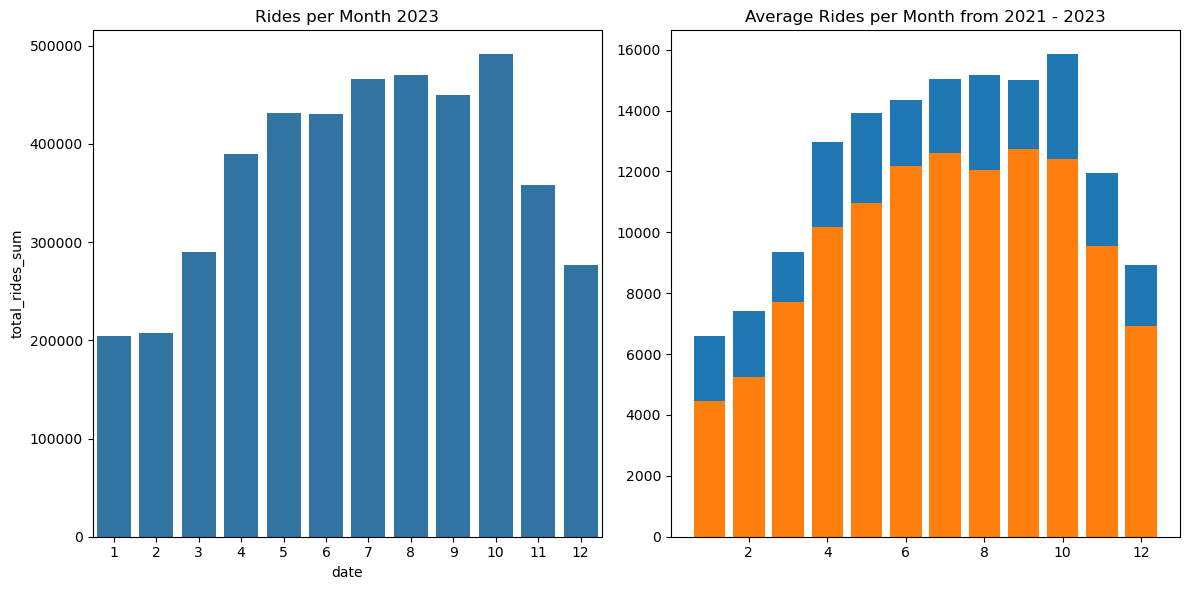

In [260]:
# 2023
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_title('Rides per Month 2023')
sns.barplot(ax=ax[0], data=data_daily_month_2023, x='date', y='total_rides_sum')

# TODO configure x-axis, set labels
ax[1].set_title('Average Rides per Month from 2021 - 2023')
# plt.errorbar(x=data_daily_month.index, y=data_daily_month.total_rides_mean, yerr=data_daily_month.total_rides_std)
plot = plt.bar(x=data_daily_month_2023.index, height=data_daily_month_2023.total_rides_mean)#, yerr=data_daily_month.total_rides_std)
plot = plt.bar(x=data_daily_month.index, height=data_daily_month.total_rides_mean)#, yerr=data_daily_month.total_rides_std)

plt.tight_layout()

# Weekly Activity

1. Which weekdays have the highest activity?
2. Compare average Activity and weekly and seasonal activity: How does it shift?


Algorithm for weekly activity in a given timeframe
  - Normalize each week
  - Weekday Activity: fraction of rides per day from all rides in the week
  - Activity in the timeframe: average all weekday activities

In [ ]:
def week_start_date(date):
    days_since_monday = datetime.date.isoweekday(date) - 1
    return date - datetime.timedelta(days=days_since_monday)

def year_start_of_week(date):
    return week_start_date(date).year

year_start_of_week(pd.to_datetime('2022-01-02 00:00:00'))

2021

In [248]:
def weekly_activity(df: pd.DataFrame, col_name_activity_indicator: str) -> pd.DataFrame:
    '''
    Calculate the weekly activity in the given time range.

    Returns: series with activity
    '''
    # get weeks
    if 'week_nr' not in df.columns:
        df['week_nr'] = df.date.dt.isocalendar().week
    if 'week_day' not in df.columns:
        df['week_day'] = df.date.dt.isocalendar().day
    df = df.loc[:, ['date', 'week_nr', 'week_day', col_name_activity_indicator]].copy()

    df['year_week_nr'] = df.date.apply(lambda date: str(year_start_of_week(date))) + '-' + df.week_nr.astype(str)

    # calc weekly activities
    df_group = df[['year_week_nr', col_name_activity_indicator]].groupby('year_week_nr').agg(['sum','count'])
    df_group.columns = df_group.columns.map('_'.join)
    df_group = df_group.reset_index() # NOTE groupby creates an index out of the grouping quantities
    df = pd.merge(df, df_group, on=['year_week_nr'], how='left')
    df['activity'] = df[col_name_activity_indicator] / df[col_name_activity_indicator+'_sum']
    # cut off incomplete weeks
    
    df.loc[df[col_name_activity_indicator+'_count']<7, 'activity'] = np.nan
    return df.activity

test1 = weekly_activity(data_daily, 'total_rides')
# pd.merge(test1, test2, left_on=['year_week_nr'], right_index=True, how='left')

In [249]:
data_daily['weekly_activity'] = weekly_activity(data_daily, 'total_rides')
data_daily.head()

,casual,date,member,total_rides,apparent_temperature_mean,temperature_2m_mean,wmo_code,windspeed_10m_max,week_nr,week_day,weekly_activity
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,53,5,NaN
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,53,6,NaN
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,53,7,NaN
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,1,0.126722
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2,0.130122


In [253]:
weekly_activity_2023 = data_daily[data_daily.date.dt.year == 2023]
weekly_activity_2023

,casual,date,member,total_rides,apparent_temperature_mean,temperature_2m_mean,wmo_code,windspeed_10m_max,week_nr,week_day,weekly_activity
730,3573,2023-01-01,3214,6787,8.4,10.5,1,14.7,52,7,0.206801
731,3433,2023-01-02,3807,7240,9.1,10.7,2,11.3,1,1,0.144754
732,2635,2023-01-03,4924,7559,13.1,14.2,53,20.3,1,2,0.151132
733,2488,2023-01-04,5303,7791,15.8,16.0,55,21.0,1,3,0.155770
734,2954,2023-01-05,5455,8409,11.4,12.6,51,13.0,1,4,0.168126
...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,52,3,0.061268
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,52,4,0.188031
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,52,5,0.205628
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,52,6,0.180337


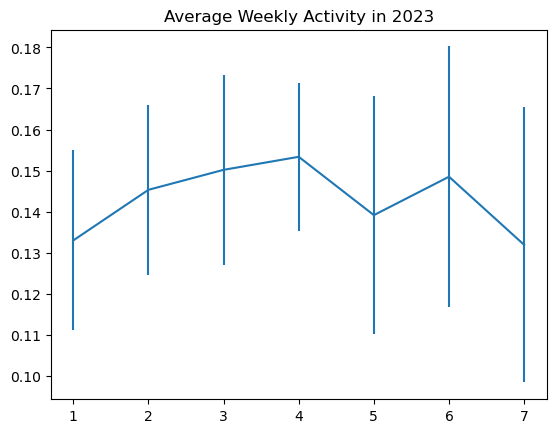

In [292]:
avg_activity = weekly_activity_2023.groupby('week_day')['weekly_activity'].mean()
avg_activity_err = weekly_activity_2023.groupby('week_day')['weekly_activity'].std()
# sns.barplot(ax=ax, data=data[-1], errorbar=err[-1])
plt.errorbar(x=avg_activity.index, y=avg_activity, yerr=avg_activity_err)
plt.title('Average Weekly Activity in 2023')
plt.show()

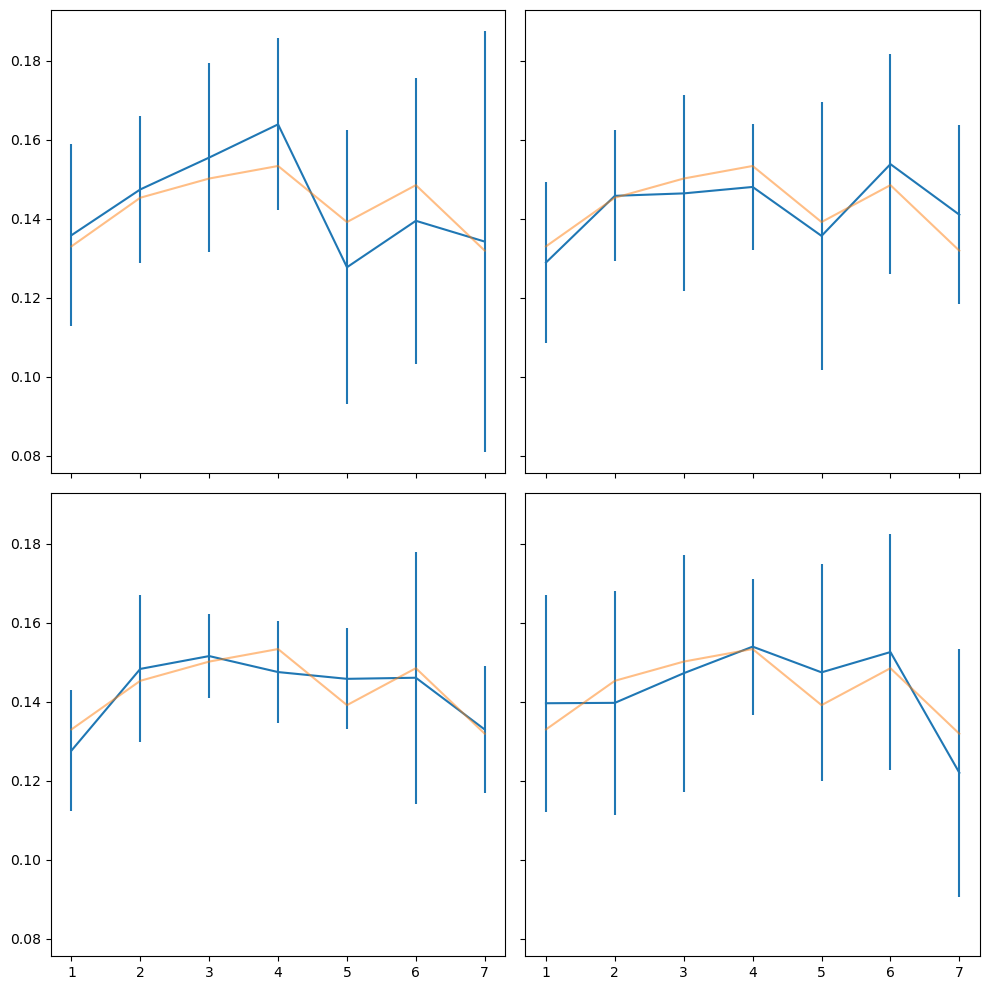

In [293]:
# Quarterly
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
axs = axs.flatten()

mask_quarters = ['q1', 'q2', 'q3', 'q4']
mask_quarters[0] = weekly_activity_2023.date.between(pd.to_datetime('2023.01.01'), pd.to_datetime('2023.04.01'))
mask_quarters[1] = weekly_activity_2023.date.between(pd.to_datetime('2023.04.01'), pd.to_datetime('2023.07.01'))
mask_quarters[2] = weekly_activity_2023.date.between(pd.to_datetime('2023.07.01'), pd.to_datetime('2023.10.01'))
mask_quarters[3] = weekly_activity_2023.date.between(pd.to_datetime('2023.10.01'), pd.to_datetime('2024.01.01'))

data, err = [], []
for ax, mask in zip(axs, mask_quarters):
    data.append(weekly_activity_2023[mask].groupby('week_day')['weekly_activity'].mean())
    err.append(weekly_activity_2023[mask].groupby('week_day')['weekly_activity'].std())
    # sns.barplot(ax=ax, data=data[-1], errorbar=err[-1])
    ax.errorbar(x=data[-1].index, y=data[-1], yerr=err[-1])
    ax.errorbar(x=avg_activity.index, y=avg_activity, alpha=0.5)

plt.tight_layout()

# Rides per hour

Which hours are the busiest?


In [295]:
# plot average number of rides per hour

In [ ]:
# temperature / wind / score vs time vs hour

# Number of rides and weather conditions

## Apparent Temperature

In [ ]:
data_daily.apparent_temperature_mean.describe() 

count    1095.000000
mean       12.836438
std        11.889420
min       -15.200000
25%         2.700000
50%        13.100000
75%        23.400000
max        34.700000
Name: apparent_temperature_mean, dtype: float64

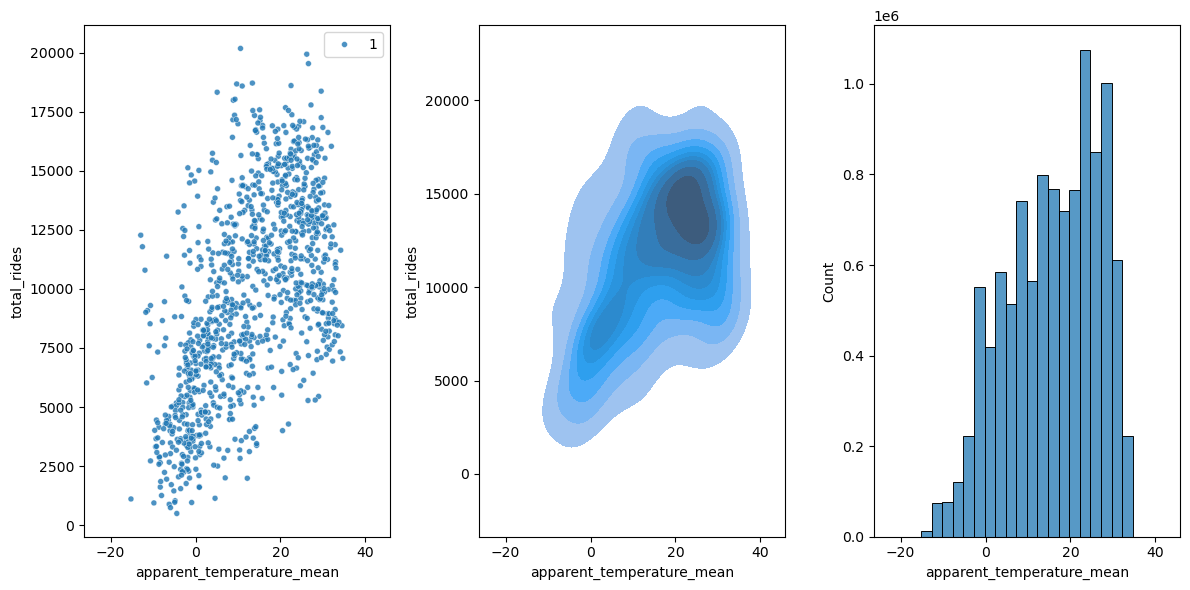

In [294]:
fig, ax = plt.subplots(1, 3, figsize=(12,6), sharex=True)
ax = ax.flatten()

sns.scatterplot(ax=ax[0], data=data_daily, y='total_rides', x='apparent_temperature_mean', size=1, alpha=0.8)
sns.kdeplot(ax=ax[1], data=data_daily, y='total_rides', weights='total_rides', x='apparent_temperature_mean', fill=True)
sns.histplot(ax=ax[2], data=data_daily, x='apparent_temperature_mean', weights='total_rides', bins=20)

plt.tight_layout()

- The total rides per day are higher on days when the weather is good, even at high temperatures.
- The number of rides decreases strongly with apparent temperatures of above 30
- Check with the hourly data:
  - separate day and night

## Windspeed

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


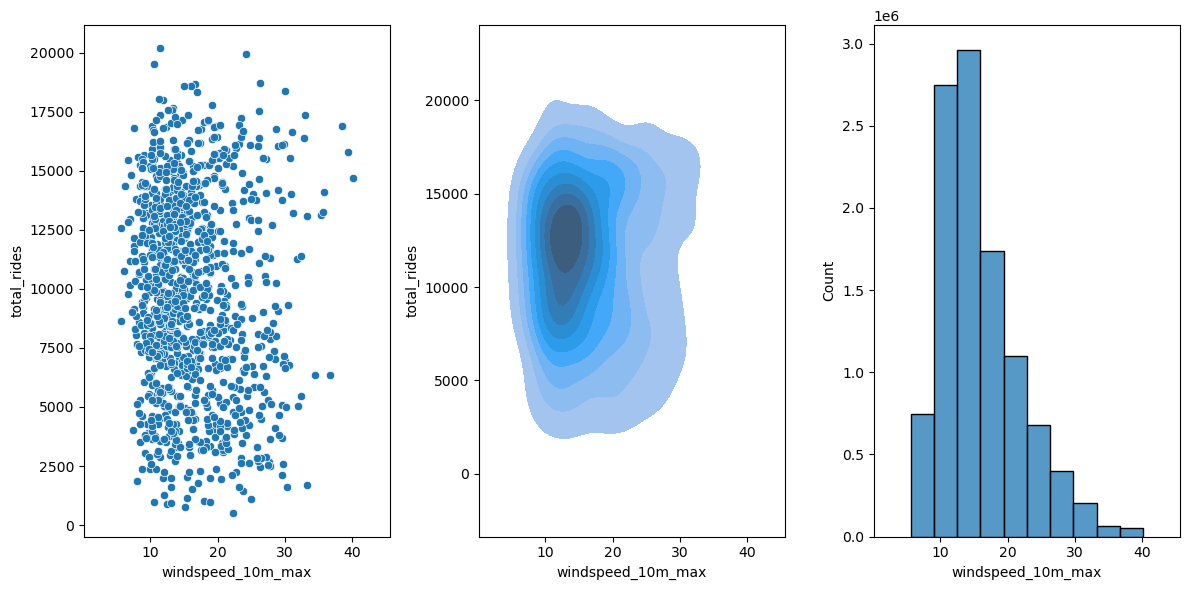

In [ ]:
# TODO remove the windspeed outliers for this plot?
fig, ax = plt.subplots(1, 3, figsize=(12,6), sharex=True)
ax = ax.flatten()

sns.scatterplot(ax=ax[0], data=data_daily, y='total_rides', x='windspeed_10m_max')
sns.kdeplot(ax=ax[1], data=data_daily, y='total_rides', x='windspeed_10m_max', weights='total_rides', fill=True)
sns.histplot(ax=ax[2], data=data_daily, x='windspeed_10m_max', weights='total_rides')

plt.tight_layout()